Assume you are a team of machine learning engineers working for an ecommerce furniture shop, where users can browse and navigate interior furniture items. You are required to build a Furniture Recommender that allows users who have recently moved to explore furniture on your ecommerce system at ease. Your systems should have a functionality to help users navigate to the category of the furniture item that users want to buy. In most of the current online shops, users should type the name of the items and browse from the list of the results. However, to enhance the quality of the searching results, our system provides an image based searching function, where the users can upload the images of the furniture item that they are looking for. The system will accomplish an image search and return the list of similar-styled furniture in favor from our dataset.
In the Furniture dataset, there are 06 categories: beds - 6578 images; chairs - 22053 images; dressers - 7871 images; lamps - 32402 images; sofas - 4080 images; tables - 17100 images, with total of 90084 images. For every category, there are 17 interior styles:
- (a) Asian; (b) Beach; (c) Contemp; (d) Craftsman; (e) Eclectic; (f) Farmhouse; 
- (g) Industrial; (h) Media; (i) Midcentury; (j) Modern; (k) Rustic; (l) Scandinavian; 
- (m) Southwestern; (n) Traditional; (o) Transitional; (p) Tropical and (q) Victorian

You have three tasks in this project:
- **Task 1:** Classify images according to furniture category (beds; chairs; dressers; lamps; sofas; tables)
- **Task 2:** Recommend 10 furniture items in our dataset which is similar to the input furniture item image from users. You are required to define a metric of “similarity” between two furniture items.
- **Task 3:** (only for those aim HD) The extension of the model in Task 2, the recommended furniture items must be in the same interior styles with the style of the input images. In order to fulfill this task, you are required to build a model to recognize the style of a furniture item.

In [1]:
from PIL import Image
import pandas as pd
import os
import hashlib
import shutil

In [2]:
dataset_folder = "../Data/Raw/Furniture_Data"

In [3]:
desired_size = (256, 256)

image_data = []
image_hashes = set()
image_color_hist = []

main_folder_name = os.path.basename(dataset_folder)

In [4]:
for root, dirs, files in os.walk(dataset_folder):
    for parent_folder in dirs:
        parent_folder_path = os.path.join(root, parent_folder)
        
        for filename in os.listdir(parent_folder_path):
            if filename == ".DS_Store":
                continue
                
            file_path = os.path.join(parent_folder_path, filename)
            
            if os.path.isdir(file_path):
                continue
                
            try:

                img = Image.open(file_path)
                resized_img = img.resize(desired_size)
                image_hash = hashlib.md5(resized_img.tobytes()).hexdigest()
                parent_folder_dir = os.path.dirname(parent_folder_path)
                parent_folder_name = os.path.basename(parent_folder_dir)
                
                # Ignore duplicates
                if image_hash not in image_hashes:
                    # Add new img to hash
                    image_hashes.add(image_hash)
                    subfolder_name = os.path.basename(parent_folder_path)
                    image_data.append((parent_folder_name, subfolder_name, resized_img))

            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

In [5]:
print(len(image_data))
print(len(image_hashes))

85165
85165


In [6]:
df = pd.DataFrame(image_data, columns=['Cat', 'Style', 'Img'])
df.head()

,Cat,Style,Img
0,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
1,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
2,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
3,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
4,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...


## EDA

For better data analysis and visualization, the dataframe is converted to .csv file

In [7]:
df.to_csv('../Data/furnitureData.csv', index=False)

In [8]:
visualized_df = pd.read_csv('../Data/furnitureData.csv')

In [9]:
visualized_df.head()

,Cat,Style,Img
0,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
1,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
2,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
3,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...
4,tables,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85165 entries, 0 to 85164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     85165 non-null  object
 1   Style   85165 non-null  object
 2   Img     85165 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


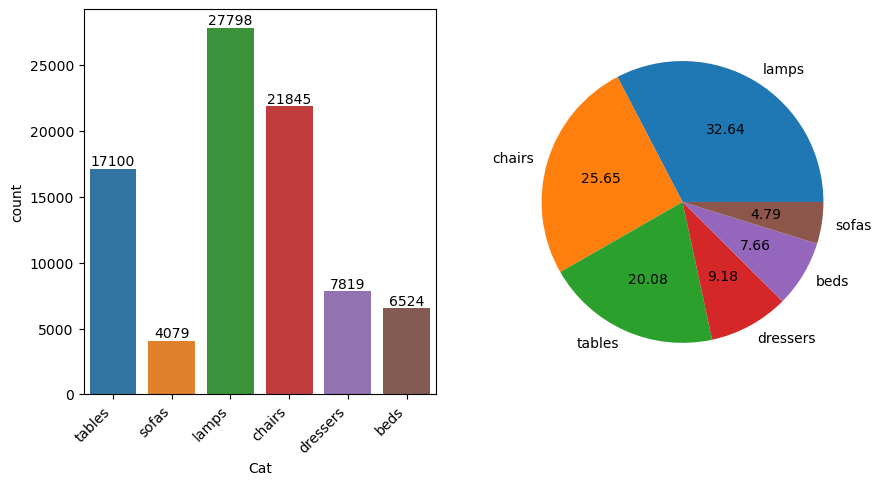

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.countplot(data=visualized_df, x='Cat', ax=ax[0])
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    ha="right"
)
for c in ax1.containers:
    ax1.bar_label(c)
    
ax2 = plt.subplot(1, 2, 2)
styles_count = visualized_df['Cat'].value_counts()
ax2.pie(styles_count, labels=styles_count.index, autopct='%.2f')

plt.show()

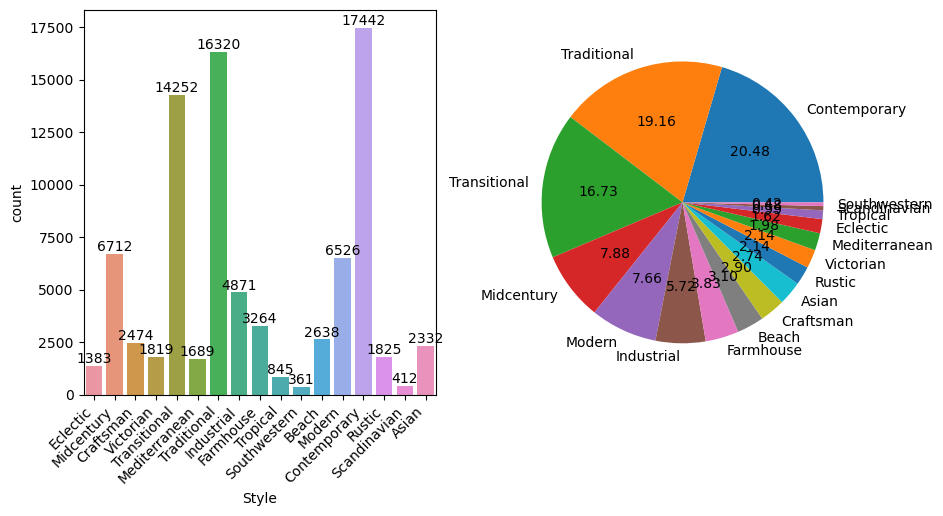

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.countplot(data=visualized_df, x='Style', ax=ax[0])
ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    ha="right"
)
for c in ax1.containers:
    ax1.bar_label(c)
    
ax2 = plt.subplot(1, 2, 2)
styles_count = visualized_df['Style'].value_counts()
ax2.pie(styles_count, labels=styles_count.index, autopct='%.2f')

plt.show()

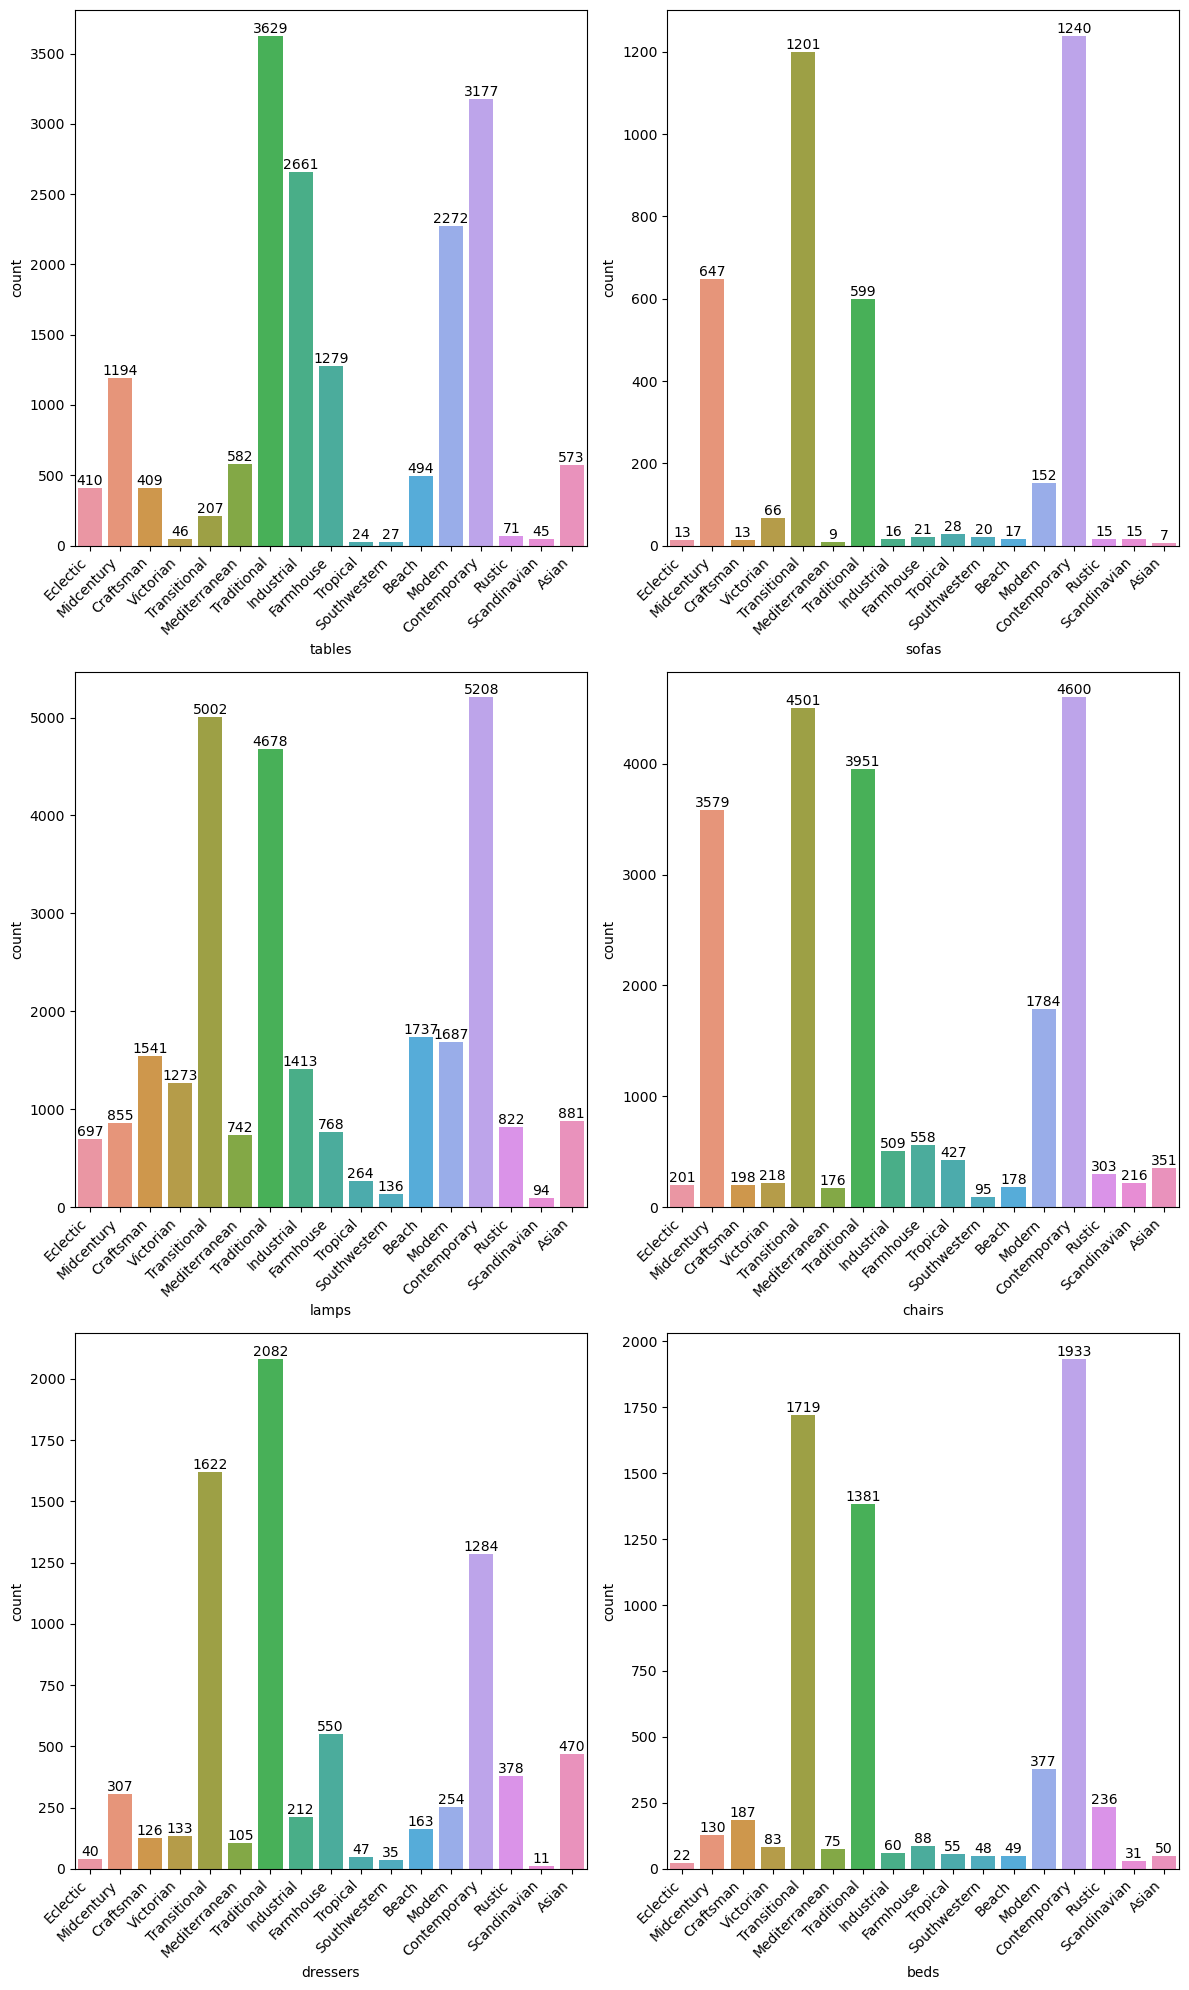

In [14]:
categories = visualized_df['Cat'].unique()

fig, axs = plt.subplots(3, 2, figsize=(12, 20))
axs = axs.flatten()

for i, category in enumerate(categories):
    category_data = visualized_df[visualized_df['Cat'] == category]
    
    row = i // 2
    col = i % 2
    
    ax = sns.countplot(data=category_data, x='Style', ax=axs[i])
    ax.set_xlabel(category)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right"
    )
    for c in ax.containers:
        ax.bar_label(c)

plt.tight_layout()
plt.show()

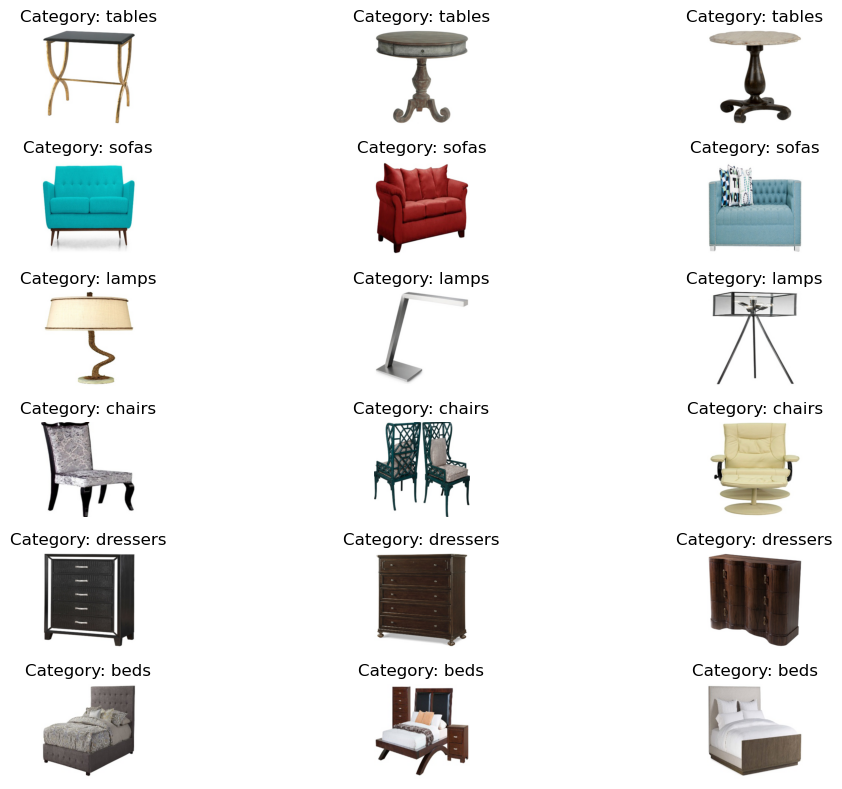

In [15]:
# Function to display sample images
def display_sample_images(df, num_images_per_category=3):
    unique_categories = df['Cat'].unique()
    fig, axes = plt.subplots(len(unique_categories), num_images_per_category, figsize=(12, 8))

    for i, category in enumerate(unique_categories):
        category_images = df[df['Cat'] == category]['Img'].sample(num_images_per_category, random_state=42)
        for j, (image, ax) in enumerate(zip(category_images, axes[i])):
            ax.imshow(image)
            ax.set_title(f"Category: {category}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)

In [ ]:
## Mode